In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import math

plt.rcParams["figure.dpi"] = 600

In [2]:
def read1_avg(filename):
    sortList = ["RTS"]
    latencyList = ['Initialization latency', 'Construction latency', 'Traversal latency']
    total = []
    for latency in latencyList:
        res = []
        f = open(filename)
        line = f.readline()
        while line: 
            if latency in line:
                line = line.strip(latency + ": ")
                line = line.strip(" (ms)\n")
                res.append(float(line))
            line = f.readline() 
        f.close() 
        res = list(map(lambda x: round(x/1000, 3), res))
        n = []
        for i in range(0, len(res), 10):
            n.append(round(sum(res[i+3:i+7])/4, 3))   
        total.append(n)
    return total

def read2_avg(filename):
    sortList = ["Elements"]
    latencyList = ['Total RUN', 'Total MERGE']
    total = []
    for latency in latencyList:
        res = []
        f = open(filename)
        line = f.readline()
        while line: 
            if latency in line:
                line = line.strip(latency + ": ")
                line = line.strip(" (ms)\n")
                res.append(float(line))
            line = f.readline() 
        f.close() 
        res = list(map(lambda x: round(x, 3), res))
        n = []
        for i in range(0, len(res), 10):
            n.append(round(sum(res[i+3:i+7])/4, 3))   
        total.append(n)
    return total

def read3_avg(filename):
    sortList = ["IPS4o"]
    latencyList = ['Sorting latency', 'Reading latency']
    total = []
    for latency in latencyList:
        for sort in sortList:
            res = []
            next = False
            f = open(filename)
            line = f.readline()
            while line: 
                if sort in line:
                    next = True
                elif latency in line and next:
                    line = line.strip(latency + ": ")
                    line = line.strip(" (ms)\n")
                    res.append(float(line))
                    next = False
                line = f.readline() 
            f.close()
            res = list(map(lambda x: round(x/1000, 3), res))
        n = []
        for i in range(0, len(res), 10):
            n.append(round(sum(res[i+3:i+7])/4, 3))
        total.append(n)
    return total

In [3]:
# get total latency stats (avg, min, max)

def read1(filename):
    sortList = ["RTS"]
    latencyList = ['Initialization latency', 'Construction latency', 'Traversal latency']
    total = []
    for latency in latencyList:
        res = []
        f = open(filename)
        line = f.readline()
        while line: 
            if latency in line:
                line = line.strip(latency + ": ")
                line = line.strip(" (ms)\n")
                res.append(float(line))
            line = f.readline() 
        f.close() 
        res = list(map(lambda x: round(x/1000, 3), res))
        total.append(res)
    return total

def read2(filename):
    sortList = ["Elements"]
    latencyList = ['Total RUN', 'Total MERGE']
    total = []
    for latency in latencyList:
        res = []
        f = open(filename)
        line = f.readline()
        while line: 
            if latency in line:
                line = line.strip(latency + ": ")
                line = line.strip(" (ms)\n")
                res.append(float(line))
            line = f.readline() 
        f.close() 
        res = list(map(lambda x: round(x, 3), res))
        total.append(res)
    return total

def read3(filename):
    sortList = ["IPS4o"]
    latencyList = ['Sorting latency', 'Reading latency']
    total = []
    for latency in latencyList:
        for sort in sortList:
            res = []
            next = False
            f = open(filename)
            line = f.readline()
            while line: 
                if sort in line:
                    next = True
                elif latency in line and next:
                    line = line.strip(latency + ": ")
                    line = line.strip(" (ms)\n")
                    res.append(float(line))
                    next = False
                line = f.readline() 
            f.close()
            res = list(map(lambda x: round(x/1000, 3), res))
        total.append(res)
    return total


def read1_stats(filename):
    out = []
    total = []
    [l1, l2, l3] = read1(filename)
    for k in range(len(l1)):
        total.append(round(l1[k] + l2[k] + l3[k], 3))
    for k in range(0, len(total), 10):
        avgV = round(sum(total[k+3:k+7])/4, 3)
        minV = round(min(total[k+3:k+7]), 3)
        maxV = round(max(total[k+3:k+7]), 3)
        out.append([(avgV, minV, maxV)])
    return out

def read2_stats(filename):
    out = []
    total = []
    [l1, l2] = read2(filename)
    for k in range(len(l1)):
        total.append(round(l1[k] + l2[k], 3))
    for k in range(0, len(total), 10):
        avgV = round(sum(total[k+3:k+7])/4, 3)
        minV = round(min(total[k+3:k+7]), 3)
        maxV = round(max(total[k+3:k+7]), 3)
        out.append([(avgV, minV, maxV)])
    return out

def read3_stats(filename):
    out = []
    total = []
    [l1, l2] = read3(filename)
    for k in range(len(l1)):
        total.append(round(l1[k] + l2[k], 3))
    for k in range(0, len(total), 10):
        avgV = round(sum(total[k+3:k+7])/4, 3)
        minV = round(min(total[k+3:k+7]), 3)
        maxV = round(max(total[k+3:k+7]), 3)
        out.append([(avgV, minV, maxV)])
    return out

In [4]:
def runall(filename1, filename2, filename3):
    xname = ['1/25', '1/8', '1/4', '1/2']
    x1 = list(range(len(xname)))

    error_params=dict(elinewidth=0.5,ecolor='grey',capsize=3)
    mpl.rcParams['hatch.linewidth'] = 0.3

    colorList = ['#0385D8', '#F45D16', '#FFCD1D']

    width = 0.25
    x2 = []
    for i in range(len(xname)):
        x2.append(x1[i] + width + 0.03)
    x3 = []
    for i in range(len(xname)):
        x3.append(x2[i] + width + 0.03)
    x = []
    for i in range(len(xname)):
        x.append(x2[i])

    # legend
    plt.figure(figsize=(2.5, 1.5))
    plt.bar(x1, [0 for i in range(len(xname))], width=width, color=colorList[0], edgecolor='black', linewidth=0.28, label='WiscSort')
    plt.bar(x2, [0 for i in range(len(xname))], width=width, color=colorList[1], edgecolor='black', linewidth=0.28, hatch='////////', label='IPS\u2074o')
    plt.bar(x3, [0 for i in range(len(xname))], width=width, color=colorList[2], edgecolor='black', linewidth=0.28, hatch='\\\\\\\\\\\\\\\\', label='TSort')
    plt.legend(ncol=3, bbox_to_anchor=(0.8, -0.35), handlelength=0.7, handletextpad=0.4, columnspacing=1.3, fontsize=7)
    plt.tight_layout()
    # plt.savefig('fig/gensort_legend.pdf', format='pdf')
    
    # comparison
    plt.figure(figsize=(2.5, 1.5))
    [l1, l2, l3] = read1_avg(filename1)
    [w1, w2] = read2_avg(filename2)
    [i1, i2] = read3_avg(filename3)

    error = [read1_stats(filename1), read2_stats(filename2), read3_stats(filename3)]
    error_upper = [[], [], []]
    error_lower = [[], [], []]
    for k in range(len(error)):
        for i in range(len(error[k])):
            error_upper[k].append(error[k][i][0][2]-error[k][i][0][0])
            error_lower[k].append(error[k][i][0][0]-error[k][i][0][1])

    plt.bar(x1, [w1[i]+w2[i] for i in range(len(w1))], width=width, color=colorList[0], edgecolor='black', linewidth=0.28, yerr=[error_lower[1], error_upper[1]], error_kw=error_params)        
    plt.bar(x2, [i1[i]+i2[i] for i in range(len(i1))], width=width, color=colorList[1], edgecolor='black', linewidth=0.28, hatch='//', yerr=[error_lower[2], error_upper[2]], error_kw=error_params)
    plt.bar(x3, [l1[i]+l2[i]+l3[i] for i in range(len(l1))], width=width, color=colorList[2], edgecolor='black', linewidth=0.28, hatch='\\\\', yerr=[error_lower[0], error_upper[0]], error_kw=error_params)

    print(f'WiscSort: {[w1[i]+w2[i] for i in range(len(w1))]}')
    print(f'IPS4o: {[i1[i]+i2[i] for i in range(len(i1))]}')
    print(f'TSort: {[l1[i]+l2[i]+l3[i] for i in range(len(l1))]}')

    for i in range(len(w1)):
        if w1[i]+w2[i] > 50:
            if round(w1[i]+w2[i]) < 100:
                plt.text(x1[i]-0.14, 50*0.89, round(w1[i]+w2[i]), color='black', size=7)    # weight='bold'
            else:
                plt.text(x1[i]-0.21, 50*0.89, round(w1[i]+w2[i]), color='black', size=7)    # weight='bold'

    # plt.yscale('log', base=2)

    plt.yticks(range(10, 50+1, 10), size=7)
    plt.xticks(x, xname, size=7)
    plt.ylabel('Latency (s)', labelpad=1.5, size=7)
    plt.xlabel('Relative DRAM space', labelpad=1, size=7)
    plt.grid(linestyle='--', axis='y', alpha=0.3)
    plt.ylim(10, 50)
    plt.tight_layout()
    # plt.savefig('fig/gensort.pdf', format='pdf')
    
    plt.show()

In [5]:
folder = '20231025_gensort'
datasize = '400m'
datatype = 'uniform'
date = '20231025'

WiscSort: [111.002, 53.877, 41.69, 36.989999999999995]
IPS4o: [28.293, 28.228, 28.329, 28.269]
TSort: [30.858, 26.419, 25.113, 24.127000000000002]


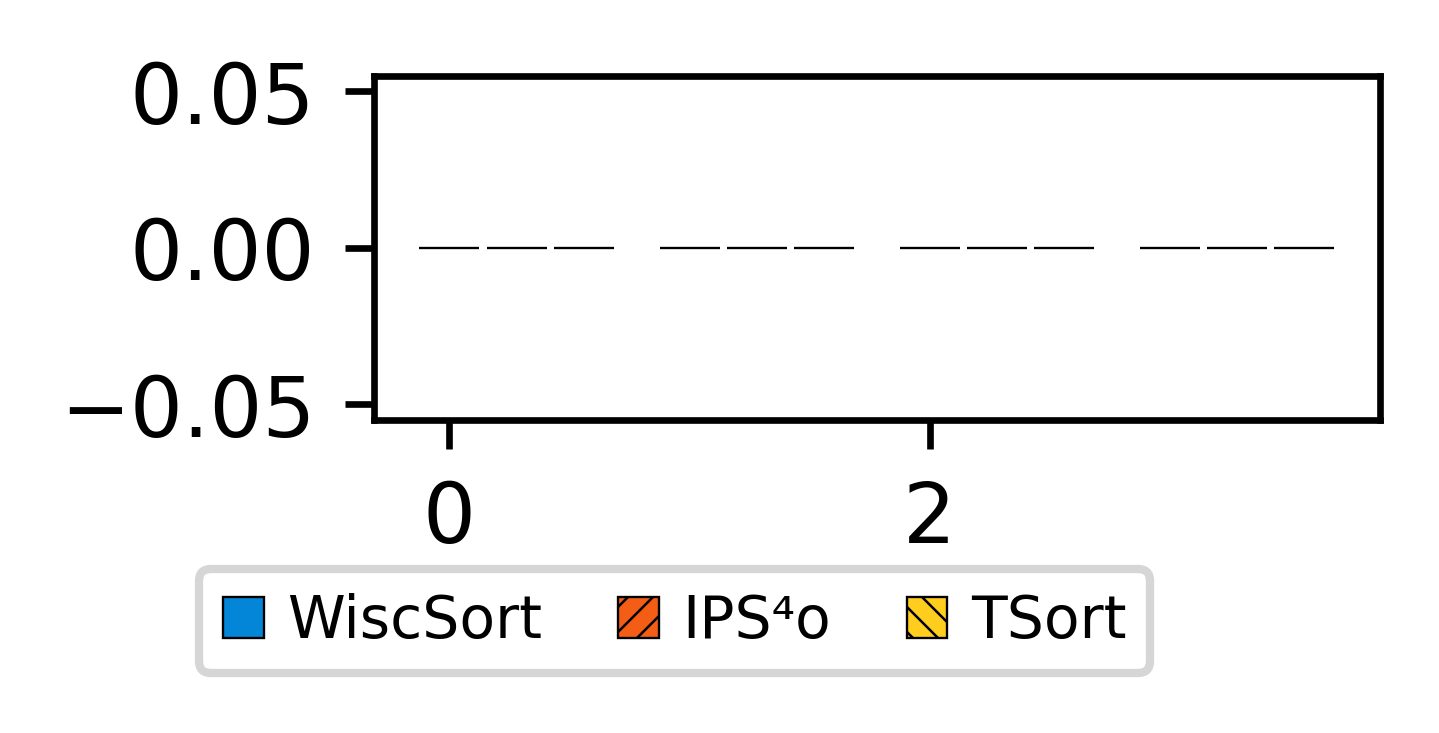

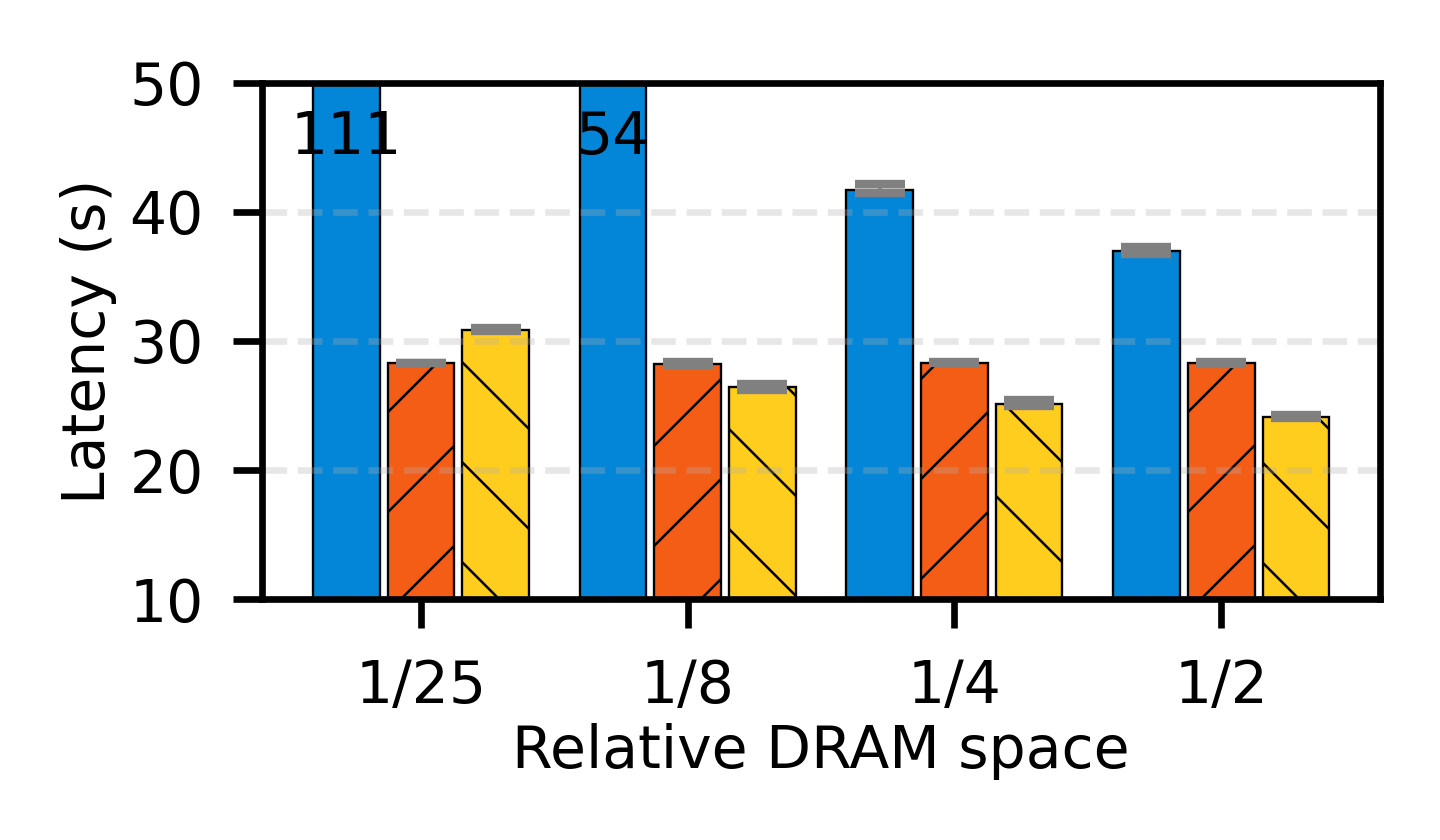

In [6]:
file = [folder+'/'+datasize+"_et_v7_gensort_"+datatype+"_"+date+".out",
    folder+'/'+datasize+"_wisc_r3w1_gensort_"+datatype+"_"+date+".out",
    folder+'/'+datasize+"_ips4o_gensort_"+datatype+"_"+date+".out"]

runall(file[0], file[1], file[2])